# Question 

### Through this project I am trying to see which factors made people more likely to survive. To do this, I start off by exploring the data from a variety of angles and try to get a sense of what the data is telling me. I make tentative conclusions on which variable could have the potential to determine survival. I also perform certain statistical tests to confirm or reject certain hypothesis that I had in mind.

# Importing Data
### I first load the dataframe into the iPython notebook by using the pandas library. 


In [179]:
import numpy as np
import pandas as pd
import scipy.stats as sp

data=pd.read_csv('titanic_data.csv', sep=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


# Cleaning the data

### Now I want to explore the variables that are not numerical in nature such as Pclass and embarked. 
### The first step towards this would be to clean up the dataframe and replace any textual data that I have with numbers so that it is easy to perform statistical operations on it or plot it later if I want to.
### Hence, I replace all the females in the sex column with 1 and all the males with 0
### I perform a similar operation on the Embark column:
### I replace S with 1, C with 2 and Q with 3.
### I also remove unnecessary columns such as Name, Cabin and Ticket. This is in no way going to be a potential variable to predict survival.




In [180]:
#Replacing females as 1 and males as 0

data= data.replace(['female', 'male', 'S', 'C', 'Q'], 
                     [1, 0, 1, 2, 3]) 
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1, level=None, inplace=False, errors='raise')
data=data.dropna()
data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,1
1,2,1,1,1,38,1,0,71.2833,2
2,3,1,3,1,26,0,0,7.9250,1
3,4,1,1,1,35,1,0,53.1000,1
4,5,0,3,0,35,0,0,8.0500,1


# Describing the data
### The data.describe() basically gives us the summary statistic for all our numberical variable. I will ignore the columns  Pclass and Embarked because they are nominal variables. I will also ignore PassengerId because its an id and so its not a numerical value 
### However, for the rest of the variables, I can see the summary statistics are defined quite well. For example, the total number of ages mentioned are 714. There are some blank values in that column. The average age for those on Titanic is 30 years and the minimum is an infant (0.42). This function gives us a good idea of the data on the first glance. 
### The mean for the sex and the survived column tells us the rate of women and rate of survival respectively. 

In [181]:
describe = data.describe()
describe = describe.drop(['Pclass', 'PassengerId', 'Embarked'], axis=1, level=None, inplace=False, errors='raise')
describe.head()

,Survived,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,0.363764,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.481420,14.492933,0.930692,0.854181,52.938648
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,0.000000,0.000000,8.050000


# Exploration of Data
## Proportion of Males vs Females. 

### I decide to plot a pie chart to visually analyze the male to female ratio on the ship. 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


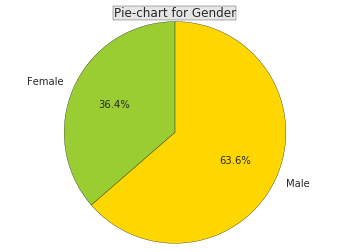

In [182]:
%pylab inline
import matplotlib.pyplot as plt

sex=data[['Sex']]

sex_female=sex[(sex == 1)]
sex_male=sex[(sex == 0)]

labels = 'Female', 'Male'
sizes = [sex_female.count(), sex_male.count()]
colors = ['yellowgreen', 'gold']
 # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pie-chart for Gender', bbox={'facecolor':'0.9', 'pad':0.1 })
fig = plt.figure()


## Passenger Class

### I plot a pie chart for passenger class. This chart tells me that approximately 55% of the ship was occupied by passengers travelling third class, then first class with approximately 24% and then second class with approximately 21%

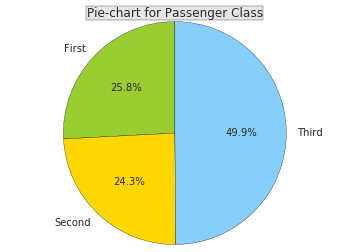

In [183]:
pclass=data['Pclass']

pclass_first=pclass[(pclass == 1)]
pclass_second=pclass[(pclass == 2)]
pclass_third=pclass[(pclass == 3)]

labels = 'First', 'Second', 'Third'
sizes = [pclass_first.count(), pclass_second.count(), pclass_third.count()]
colors = ['yellowgreen', 'gold', 'lightskyblue']


plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pie-chart for Passenger Class', bbox={'facecolor':'0.9', 'pad':0.1 })



fig = plt.figure()


### I do the same for embarked. I found this variable interesting because one port could be a wealthier area compared to another. For example, majority of the people from S could be travelling first class while everyone from Q could be travelling third class. This is worth thinking about because later we will see how class could be considered to be a predictor of survival and if class is correlated with embarked, then embarked could also be considered to be a predictor of survival

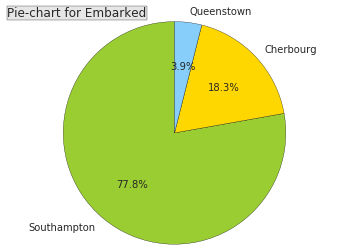

In [184]:
embarked=data['Embarked']

embarked_first=embarked[(embarked == 1)]
embarked_second=embarked[(embarked == 2)]
embarked_third=embarked[(embarked == 3)]

labels = 'Southampton', 'Cherbourg' , 'Queenstown'
sizes = [embarked_first.count(), embarked_second.count(), embarked_third.count()]
colors = ['yellowgreen', 'gold', 'lightskyblue']


plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pie-chart for Embarked',loc='Left', bbox={'facecolor':'0.9', 'pad':0.1 })

fig=plt.figure()


## Correlation between class and embarked.

### Just checking if my earlier hypothesis is true.
### From what it looks like, there is very low correlation between class and embarkment. 
### Note: I was doubtful whether I can use pearson's r to find the correlation coefficient for two nominal variables but after verifying, I realized you can use the phi coefficient which is the same as a Pearson's r for nominal variables. 

In [185]:
print "The correlation and the p-value for Pclass and Embarked is " + str(sp.stats.pearsonr(data.Pclass, data.Embarked))

The correlation and the p-value for Pclass and Embarked is (-0.10850162878875162, 0.0037476188967358356)


## Plotting the distribution of age 
### We can see that the distribution of age is approximating that of a normal distribution. 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


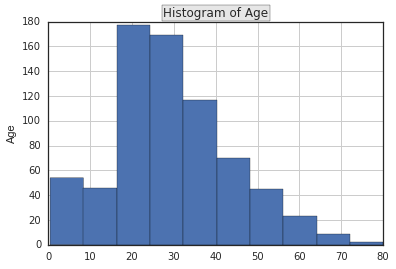

In [186]:
%pylab inline
import matplotlib.pyplot as plt
#Plotting Age as a histogram
data.hist('Age')
plt.title('Histogram of Age', bbox={'facecolor':'0.9', 'pad':1.5 })
plt.suptitle("")

ylabel('Age')
fig=plt.figure()

### I want to see what the distribution of age is when it is grouped by sex
### Looks like the median age for women is lower than that of men.

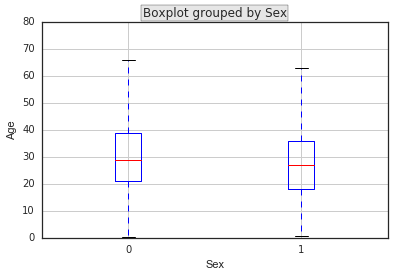

In [187]:
#Boxplot for age 
data.boxplot('Age', 'Sex')
plt.title('Boxplot grouped by Sex', bbox={'facecolor':'0.9', 'pad':1.5 })
plt.suptitle("")
xlabel('Sex')
ylabel('Age')
fig=plt.figure()

### I now check the distribution of fare. It looks like it is skewed towards the left which could mean that most tickets were bough around 20-30 pounds (I'm not sure if that's the currency). 

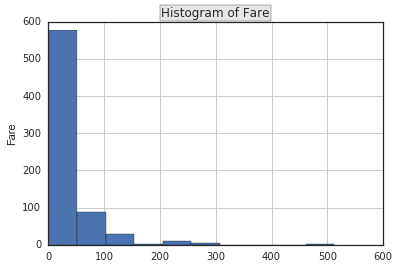

In [188]:
data.hist('Fare')
plt.title('Histogram of Fare', bbox={'facecolor':'0.9', 'pad':1.5 })
plt.suptitle("")
ylabel('Fare')
fig=plt.figure()

### Then I check the distribution for fare grouped by sex

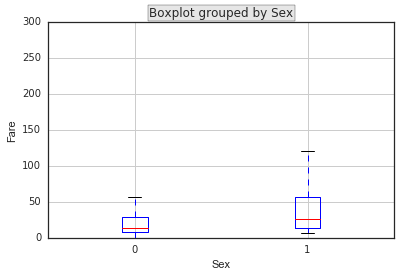

In [189]:
data.boxplot('Fare', 'Sex')
plt.ylim(0, 300)
plt.title('Boxplot grouped by Sex', bbox={'facecolor':'0.9', 'pad':1.5 })
plt.suptitle("")
xlabel('Sex')
ylabel('Fare')
fig=plt.figure()
plt.show()

# Correlation
### I want to learn how other variables react with the variable Survived.
### As we can see below class is negatively correlated with survived. This makes sense. My hupothesis is that those who were in the first class had a higher chance of surviving than those in the 2nd and third class. I will look deeper into the variable by running a chi square test later on.
### Fare is also correlated with survival. Again this makes sense because those who are in first class would have paid a higher fare. 
### Sex is also correlated. I think females have a higher chance of surviving than men do because in a case of emergency, women and children are given first priority. We will look at this variable further by visualizing if women had a higher chance of surviving than men did. 
### Let's take a look at all the p-values. On the right we have the two-tailed p-value. Only Age, Parch and Embarked are significant variables at the 0.05 level. This is a major flaw in the analysis because while pclass and suvived are negatively correlated, the correlation doesn't seem to be significant at the 0.05 level. This means that we cannot reject the null hypothesis that people travelling by different classes have the same rate of survival. 

In [190]:
print "The correlation and the p-value for Pclass and Survived is " + str(sp.stats.pearsonr(data.Pclass, data.Survived))
print "The correlation and the p-value for Age and Survived is " + str(sp.stats.pearsonr(data.Age,data.Survived))
print "The correlation and the p-value for SibSp and Survived is " + str(sp.stats.pearsonr(data.SibSp,data.Survived))
print "The correlation and the p-value for Parch and Survived is " + str(sp.stats.pearsonr(data.Parch,data.Survived))
print "The correlation and the p-value for Fare and Survived is " + str(sp.stats.pearsonr(data.Fare,data.Survived))
print "The correlation and the p-value for Sex and Survived is " + str(sp.stats.pearsonr(data.Sex, data.Survived))
print "The correlation and the p-value for Embarked and Survived is " + str(sp.stats.pearsonr(data.Embarked, data.Survived))

The correlation and the p-value for Pclass and Survived is (-0.35646158844523823, 9.3036197426767614e-23)
The correlation and the p-value for Age and Survived is (-0.082445868043413945, 0.027820316250842768)
The correlation and the p-value for SibSp and Survived is (-0.015523023631749389, 0.6792380720539426)
The correlation and the p-value for Parch and Survived is (0.095265294286852972, 0.010980612364523213)
The correlation and the p-value for Fare and Survived is (0.2660996004765806, 5.2567957806816485e-13)
The correlation and the p-value for Sex and Survived is (0.53676162334850308, 2.2428516419827233e-54)
The correlation and the p-value for Embarked and Survived is (0.1085168225541973, 0.003742741768124733)


# Correlation Matrix
### In order to better understand the correlations between all the variables, I decided to plot a correlation matrix. This helps us visualize the data better. We can see that fare and Pclass are negatively correlated. What's surprising is that age and Pclass are negatively correlated. This has a convoluted explanation according to me. The older you are, the more money you have and the better class you have. I think the omitted variable here is income. 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Text yticklabel objects>)

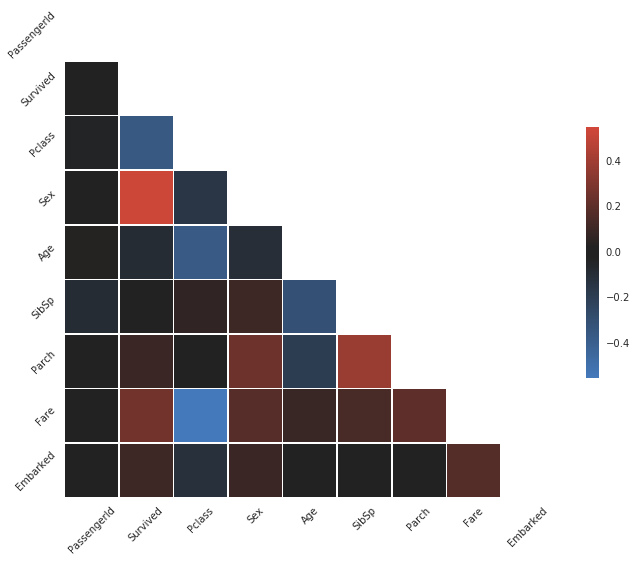

In [191]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, center='dark', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

### Statistical Test: Chi-Squared Test
### During this exploratory phase, the scene from Titanic-the movie where Kate Winslet's fiancee is bribing the security in order to get on the life boat came to mind. This made me think if it was plausible to believe that those who were travelling first class were allowed to get on the life boat first. I decided to explore the three variables gender and which class they were residing in. So I decided to run a Chi-squared test to see if they supported my hypothesis or not. Let’s look at my Expected and Observed values. 

### What is my null hypothesis?
### Ho: My null hypothesis is that everyone has an equal chance of surviving regardless of their gender or which class they are travelling. 
### In other words, my null hypothesis is the expected values table mentioned below:

In [192]:
expected_values = {'1st_female' : pd.Series([36.08080808, 57.91919192, 94], index=['Yes', 'No', 'Total']),
   '1st_male' : pd.Series([46.82828283, 75.17171717, 122], index=['Yes', 'No', 'Total']),
    '2nd_female' : pd.Series([84.44444444, 135.5555556, 220], index=['Yes', 'No', 'Total']),
    '2nd_male' : pd.Series([174.6464646, 280.3535354, 455], index=['Yes', 'No', 'Total']),
    'Total' : pd.Series([342, 549, 891], index=['Yes', 'No', 'Total'])}

expected_values = pd.DataFrame(expected_values)
expected_values

,1st_female,1st_male,2nd_female,2nd_male,Total
Yes,36.080808,46.828283,84.444444,174.646465,342
No,57.919192,75.171717,135.555556,280.353535,549
Total,94.000000,122.000000,220.000000,455.000000,891


### The assumptions of the chi-square test:


### 1) The data in the cells should be frequencies, or counts of cases rather than percentages or some other transformation of the data.
### 2) The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
### 3) Each subject may contribute data to one and only one cell in the χ2. If, for example, the same subjects are tested over time such that the comparisons are of the same subjects at Time 1, Time 2, Time 3, etc., then χ2 may not be used.
### 4) The study groups must be independent. This means that a different test must be used if the two groups are related. For example, a different test must be used if the researcher’s data consists of paired samples, such as in studies in which a parent is paired with his or her child.
### 5) There are 2 variables, and both are measured as categories, usually at the nominal level. However, data may be ordinal data. Interval or ratio data that have been collapsed into ordinal categories may also be used. While Chi-square has no rule about limiting the number of cells (by limiting the number of categories for each variable), a very large number of cells (over 20) can make it difficult to meet assumption #6 below, and to interpret the meaning of the results.
### 6) The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3). This assumption is most likely to be met if the sample size equals at least the number of cells multiplied by 5. Essentially, this assumption specifies the number of cases (sample size) needed to use the χ2 for any number of cells in that χ2. 

### Then I calculate the observed values.

In [193]:
observed_values = {'1st_female' : pd.Series([91, 3, 94], index=['Yes', 'No', 'Total']),
   '1st_male' : pd.Series([45, 77, 122], index=['Yes', 'No', 'Total']),
    '2nd_female' : pd.Series([142, 78, 220], index=['Yes', 'No', 'Total']),
    '2nd_male' : pd.Series([64, 391, 455], index=['Yes', 'No', 'Total']),
    'Total' : pd.Series([342, 549, 891], index=['Yes', 'No', 'Total'])}

observed_values = pd.DataFrame(observed_values)
observed_values

,1st_female,1st_male,2nd_female,2nd_male,Total
Yes,91,45,142,64,342
No,3,77,78,391,549
Total,94,122,220,455,891


### I calculated the chi-squared value: 
### The value is 313.218148 at 3 degrees of freedom. 
### I then calculated the p-value at alpha=0.05: p-value < 0.0001

### According to this result we can conclude that our results are statistically significant and we can reject the null hypothesis that everyone has an equal chance of surviving regardless of their sex and the class they are travelling by.


## Exploring Survival By Sex
### I want to explore the survival rate by sex further. If you look at the pie charts below, you realize that majority of those who survived were female even though the ship comprised of a lesser proportion of females. Through the pie charts, I can tentatively conclude that women had a better chance of surviving the ship wreck. 

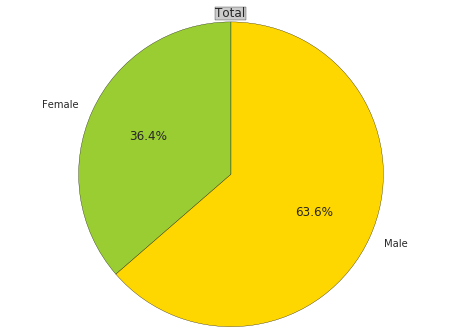

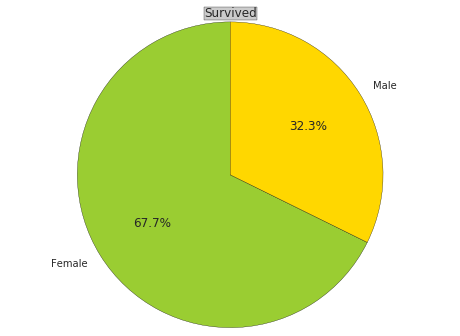

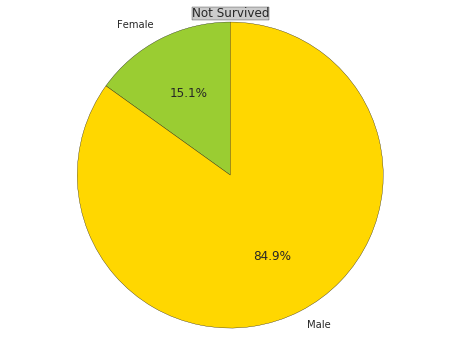

In [194]:
#Total
sex=data[['Sex']]

sex_female=sex[(sex == 1)]
sex_male=sex[(sex == 0)]

labels = 'Female', 'Male'
sizes = [sex_female.count(), sex_male.count()]
colors = ['yellowgreen', 'gold']


plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
title('Total', bbox={'facecolor':'0.8', 'pad':0.1 })
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

fig = plt.figure()



#Survived
sex_survived=data[['Sex', 'Survived']]
sex_survived=sex_survived[(sex_survived.Survived == 1)]
sex_survived

sex_survived_female=sex_survived.Sex[(sex_survived.Sex == 1)]
sex_survived_male=sex_survived.Sex[(sex_survived.Sex == 0)]

labels = 'Female', 'Male'
sizes = [sex_survived_female.count(), sex_survived_male.count()]
colors = ['yellowgreen', 'gold']


plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
title('Survived', bbox={'facecolor':'0.8', 'pad':0.1 })
plt.axis('equal')
fig = plt.figure()



#Not survived
sex_notsurvived=data[['Sex', 'Survived']]
sex_notsurvived=sex_notsurvived[(sex_notsurvived.Survived == 0)]


sex_survived_female=sex_notsurvived.Sex[(sex_notsurvived.Sex == 1)]
sex_survived_male=sex_notsurvived.Sex[(sex_notsurvived.Sex == 0)]

labels = 'Female', 'Male'
sizes = [sex_survived_female.count(), sex_survived_male.count()]
colors = ['yellowgreen', 'gold']


plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
title('Not Survived', bbox={'facecolor':'0.8', 'pad':0.1 })
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

fig = plt.figure()


plt.show()




# Drawbacks
### The drawbacks of the analysis is that it doesn't give us a definite answer about anything. I can only make tentative conclusions based on the preliminary data analysis that I have carried out. 
### Missing data points: Like I have pointed out earlier, there are quite a few missing data points in a few of the columns in the dataset. This could be problematic when I am plotting single columns because it could give us the wrong proportion. For eg, what if I plot the proportion of females vs males when it comes to their survival. While the proportion is calculated correctly based on the data that I am provided with, it represents a flawed visual because there are more men and women in the dataset but their gender is not recorded. 
### A solution the sex column is to look at the names of the passengers and input the gender manually. This could take time if the dataset is very big or there are too many missing values. 


# Conclusion

### Through this analysis I can tentatively conclude that Pclass, Sex and Age can have the potential to determine Survival but only further statistical modelling can give us a more concrete result. 